### Insurance claim prediction

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_csv("insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


From the output of the `data.describe()` function, some important observations can be made:

- Age: The dataset consists of individuals with ages ranging from 18 to 64. The mean age is approximately 39 years, with a standard deviation of 14.05.
- BMI: The BMI (Body Mass Index) values range from 15.96 to 53.13. The mean BMI is approximately 30.66, with a standard deviation of 6.10.
- Children: The number of children per individual ranges from 0 to 5. The mean number of children is approximately 1.09, with a standard deviation of 1.21.
- Charges: The medical charges vary significantly, ranging from 1,121.87 to 63,770.43. The mean charge is approximately 13,270.42, with a standard deviation of 12,110.01.

These observations provide a summary of the distribution and central tendencies of the numerical features in the dataset.

In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

- It can be clearly observed that there are no null values in the data

### Exploratory Data Analsysis

As a research student working on a project, an important question arises regarding the relationship between age and medical charges. To investigate this, a plot was examined, which is presented below. Additionally, the potential influence of sex on this relationship was also explored. The analysis reveals an interesting pattern characterized by three prominent, parallel lines. Across all three lines, there is a noticeable increase in charges as age increases. This observation suggests a strong correlation between age and medical charges, indicating that age could be a significant factor in determining healthcare costs. Further analysis and statistical tests are required to validate and explore this relationship in greater detail.

Text(0.5, 1.0, 'Effect of Age on Charges')

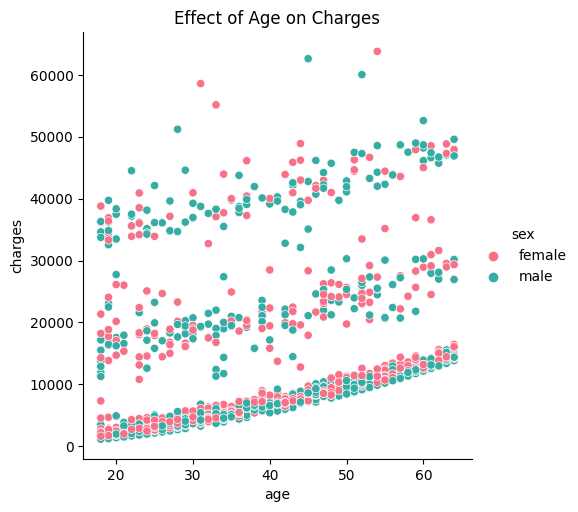

In [7]:
sns.relplot(x='age', y='charges', hue= 'sex', data=data, palette='husl')
plt.title('Effect of Age on Charges')

In order to investigate the presence of gender-specific patterns, I conducted a separate analysis based on the variable 'sex'. The results obtained from this analysis revealed a similar pattern to the overall analysis conducted previously.

<ipython-input-8-9b5f9e2ed7e2>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(x='age', y='charges', col='sex',data=data, palette='husl')


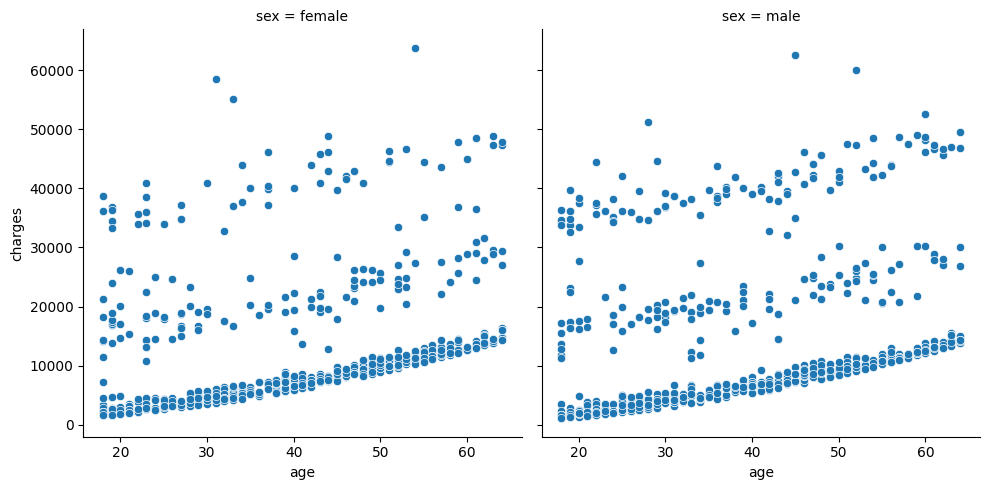

In [8]:
sns.relplot(x='age', y='charges', col='sex',data=data, palette='husl')

Based on the observed patterns in the plot, I have made the decision to incorporate a significant feature, 'Smoking', which appears to have a notable impact on medical charges. The plot clearly demonstrates that as age increases, individuals who smoke exhibit a more substantial rise in medical charges compared to non-smokers. This suggests a synergistic relationship between age and smoking, wherein older individuals who smoke experience significantly higher charges in comparison to non-smokers. As a research student working on my project, this finding underscores the importance of considering the interplay between age and smoking when analyzing medical charges in our study.

Text(0.5, 1.0, 'Combined effect of Age and Smoking on Charges')

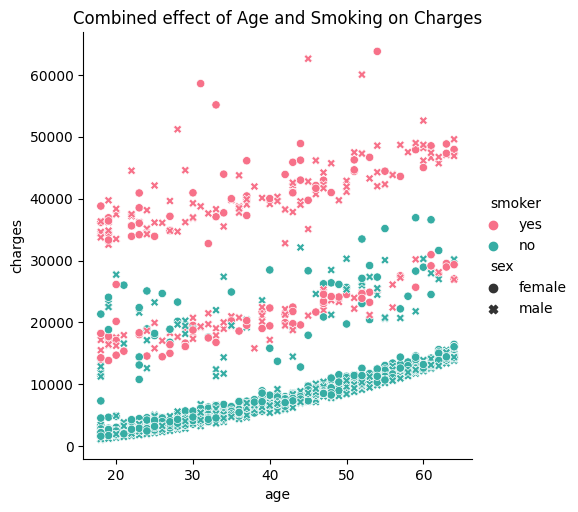

In [9]:
sns.relplot(x='age', y='charges', hue='smoker', style= 'sex', data=data, palette='husl')
plt.title('Combined effect of Age and Smoking on Charges')

In the research project, an investigation was conducted to examine the association between charges and age, considering the distinction between smokers and non-smokers for both genders. Analysis of the lmplot revealed a consistent trend, indicating that as age increases, charges tend to be higher for smokers compared to non-smokers, regardless of gender. Furthermore, it was observed that non-smokers generally had lower charges than smokers across different age groups and genders.

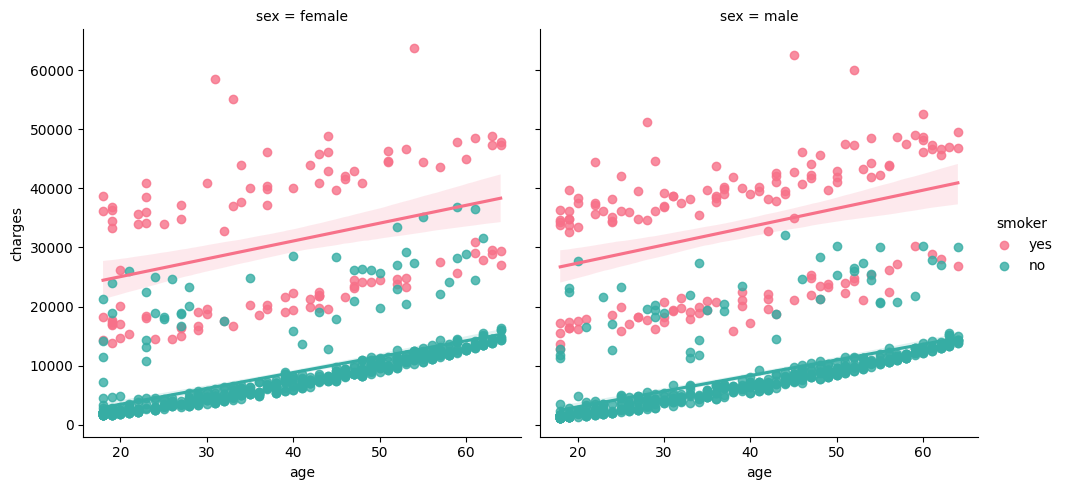

In [10]:
sns.lmplot(x='age', y='charges', hue='smoker', col='sex',data=data, palette='husl')

The relationship between smoking status (smoker/non-smoker) and medical charges, analyzed by gender, is observed to be evident in the violin plot presented below. The plot reveals that, across both genders, non-smokers tend to have medical charges predominantly below $20,000, whereas charges for smokers are generally higher.

Text(0.5, 1.0, 'Effect of Smoking on Charges of males and females')

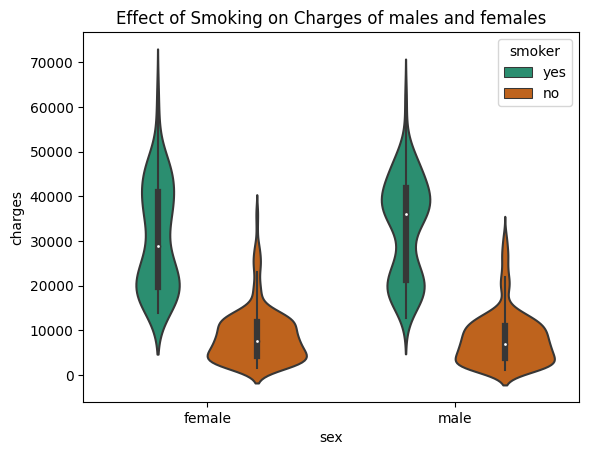

In [11]:
sns.violinplot(x="sex", y='charges', hue="smoker", data=data, palette='Dark2')
plt.title('Effect of Smoking on Charges of males and females')

As a research student working on a project, it is observed that the data reveals interesting insights regarding the number of smokers and non-smokers among males and females, as well as the mean charges associated with them.

Specifically, the analysis indicates that there are 547 non-smoker females and 517 non-smoker males in the dataset. On the other hand, there are 115 female smokers and 159 male smokers.

Furthermore, the mean charges for different groups are as follows:
- Non-smoker females: $8,762
- Non-smoker males: $8,087
- Smoker females: $30,678
- Smoker males: $33,042

To visualize the distribution of smokers and non-smokers among genders, two bar plots have been created. These visualizations provide a clear representation of the disparities in smoking habits and the associated mean charges between females and males.

In [12]:
data_grouped=data.groupby(['smoker', 'sex']).agg({'charges':'sum','sex':'count'})
data_grouped['mean_charges']= data_grouped['charges']/data_grouped['sex']
data_grouped=data_grouped.rename(columns={'sex':'number_in_gender'})
data_grouped.index=[0,1,2,3]
data_grouped['smoker']=['no','no','yes','yes']
data_grouped['sex']=['female','male','female','male']
data_grouped=data_grouped[['smoker', 'sex','number_in_gender','charges','mean_charges']]
data_grouped

,smoker,sex,number_in_gender,charges,mean_charges
0,no,female,547,4.792977e+06,8762.297300
1,no,male,517,4.181085e+06,8087.204731
2,yes,female,115,3.528085e+06,30678.996276
3,yes,male,159,5.253679e+06,33042.005975


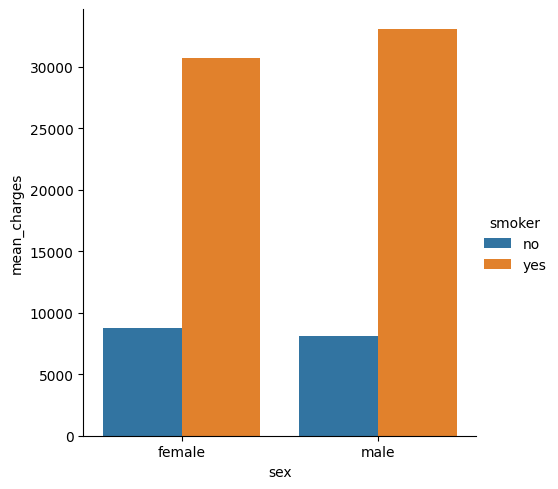

In [13]:
sns.catplot(x='sex',y='mean_charges',hue='smoker',kind='bar',data=data_grouped)

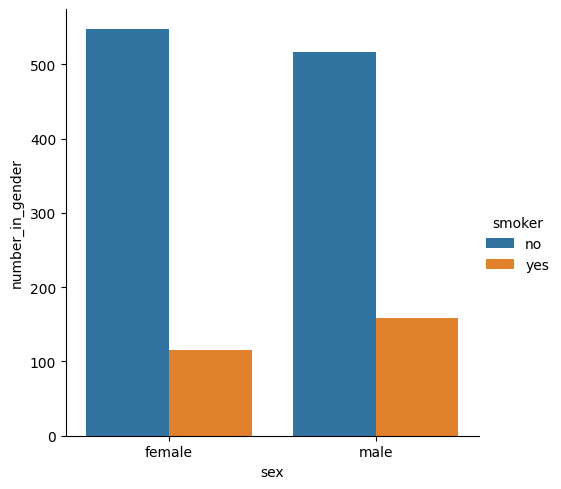

In [14]:
sns.catplot(x='sex',y='number_in_gender',hue='smoker',kind='bar',data=data_grouped)

In the research project, the influence of Body Mass Index (BMI) on medical charges is examined. BMI is a measure of body weight status and is known to be correlated with metabolic diseases due to higher body fat. Different BMI ranges categorize individuals as underweight, normal, overweight, or obese. The objective is to investigate whether higher BMI values are associated with higher medical charges.

Initially, when analyzing the first scatterplot, the direct influence of BMI on charges is not readily apparent. However, upon considering the 'smoker' feature and examining the second scatterplot, the relationship between BMI and medical charges becomes more evident. It is observed that individuals who have higher BMI and are smokers tend to incur higher charges compared to non-smokers with similar BMI values. This suggests a potential synergistic relationship between smoking and BMI in relation to medical charges.

Text(0.5, 1.0, 'Effect of BMI on Charges')

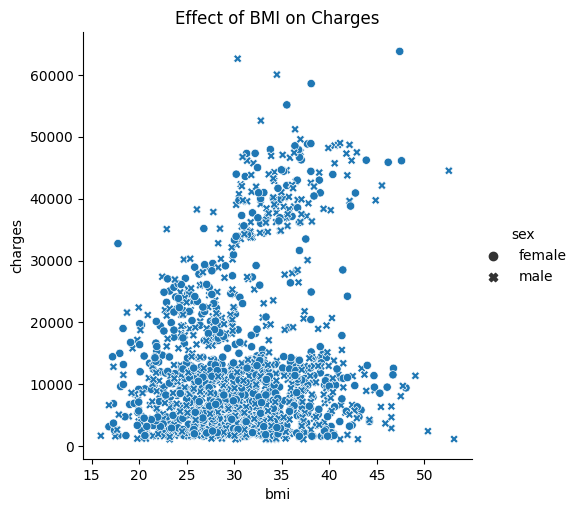

In [15]:
sns.relplot(x='bmi',y='charges',style='sex',data=data)
plt.title('Effect of BMI on Charges')

It is observed that the combination of obesity and smoking is associated with increased medical expenses, as depicted in the scatter plot below.

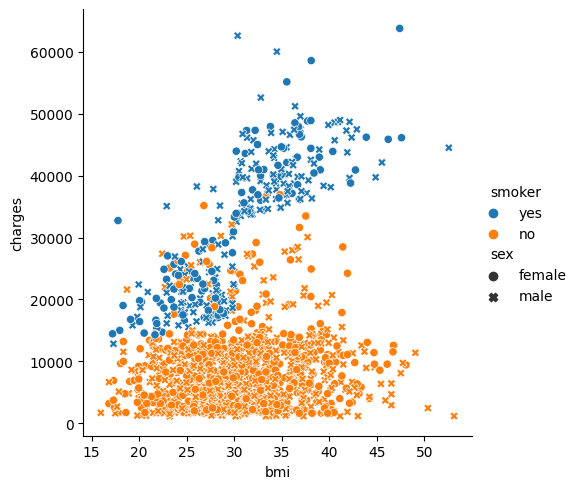

In [16]:
sns.relplot(x='bmi',y='charges',hue='smoker',style='sex',data=data)

In this research project, the combined influence of BMI and smoking on genders was investigated. The observations indicate that both males and females demonstrate similar effects of smoking and BMI on medical charges. Specifically, when smoking is combined with an increasing BMI, there is an observed increase in medical charges.

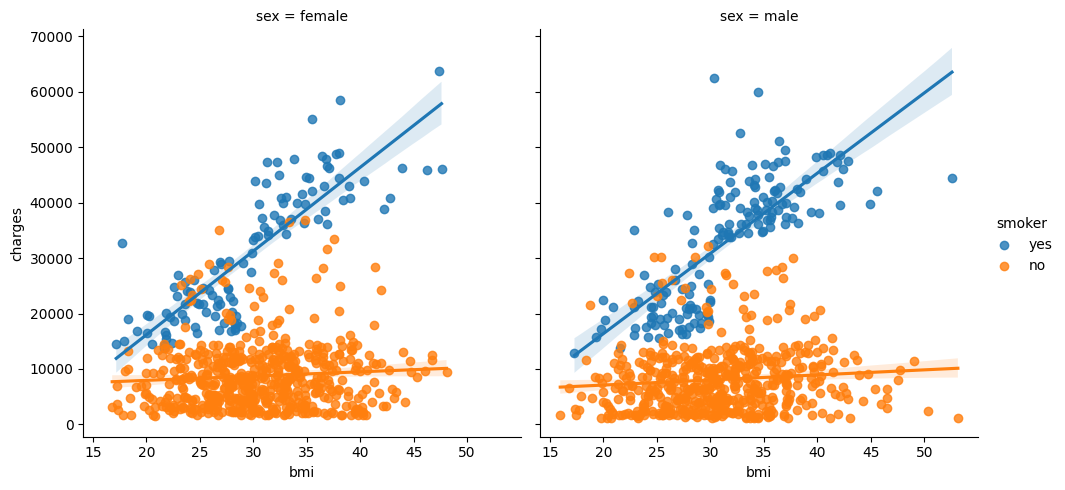

In [17]:
sns.lmplot(x='bmi',y='charges',hue='smoker', col='sex',data=data)

As a research student working on a research project, an exploratory analysis was conducted to investigate potential correlations between the features. A pairplot was examined to visualize the relationships between the variables. Notably, an interesting observation emerged from the analysis, indicating that parents with five children tend to have lower medical expenses compared to other groups.

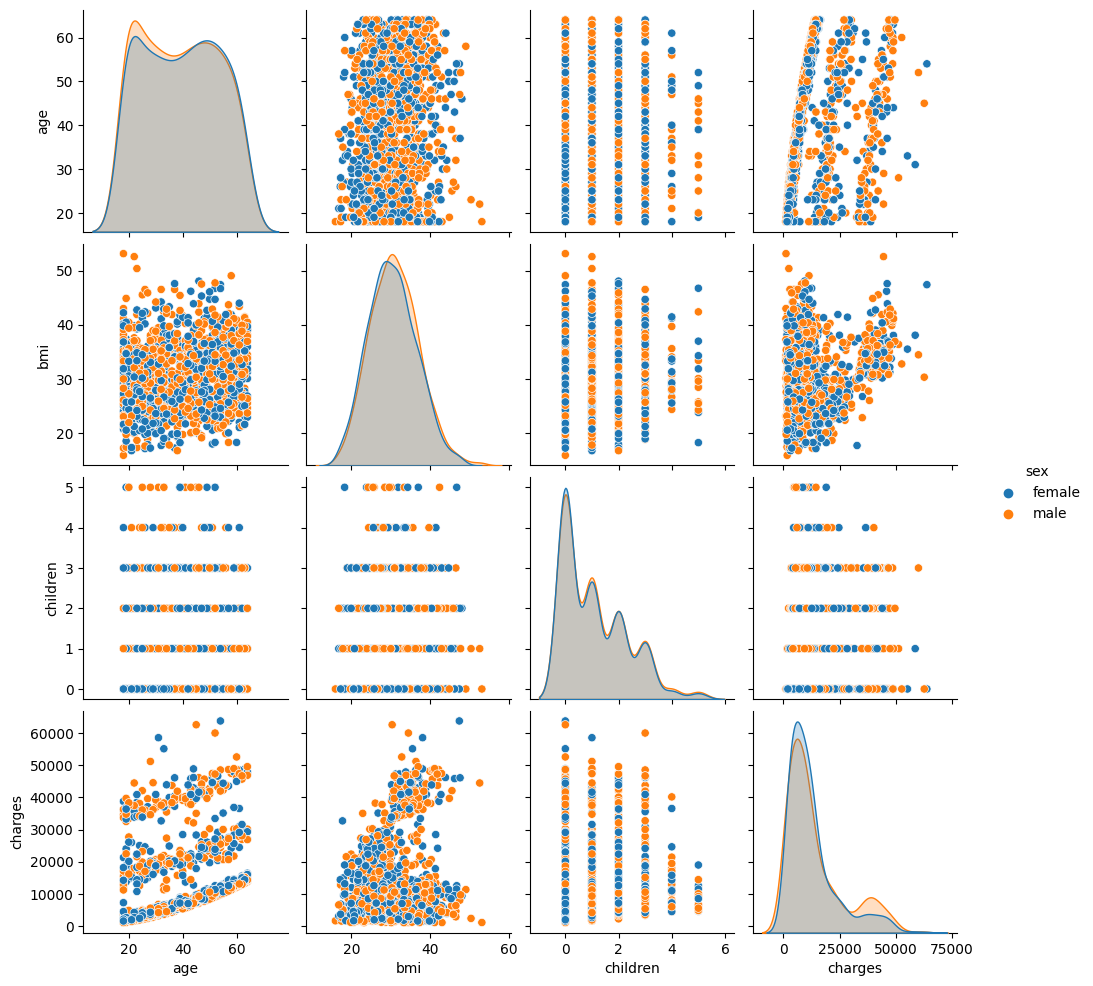

In [18]:
sns.pairplot(data, vars= ['age','bmi','children','charges'], hue='sex')

To further investigate the aforementioned observation, an examination of the charges incurred by fathers and mothers was conducted. It is observed that parents with five children tend to have lower medical billings, as evidenced by the boxplot displayed below. These parents exhibit lower average medical charges compared to other individuals in the dataset.

Text(0.5, 1.0, 'Charges vs number of children')

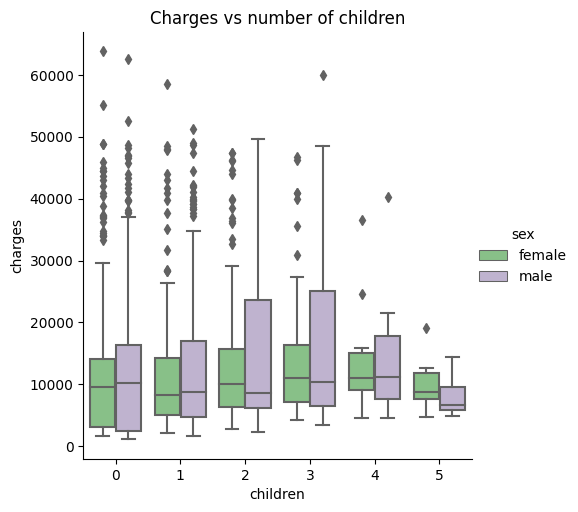

In [19]:
sns.catplot(x="children", y='charges', hue='sex', kind='box',data=data, palette= 'Accent')
plt.title('Charges vs number of children')

It is observed that there is a correlation between parental smoking habits and higher medical expenses, as evidenced by the boxplot analysis conducted in this research project.

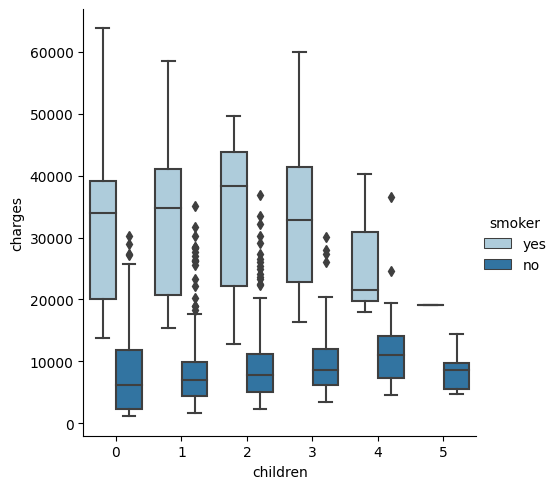

In [20]:
sns.catplot(x="children", y='charges', hue='smoker', kind='box',data=data , palette= 'Paired')

As an aspiring researcher working on a research project, the analysis reveals interesting findings regarding the average and median charges among parents with varying numbers of children. It is observed that parents with five children tend to have lower mean charges compared to parents with other numbers of children. Additionally, when considering the median charges, both parents with one child and parents with five children exhibit relatively lower values. These observations shed light on the potential impact of the number of children on the financial aspects of parenting.

In [21]:
data_grouped2=data.groupby('children').agg({'charges':'sum','sex':'count'})
data_grouped2['mean_charges2']=data_grouped2['charges']/data_grouped2['sex']
data_grouped2['median_charges']=data.groupby('children')['charges'].median()
data_grouped2

,charges,sex,mean_charges2,median_charges
children,,,,
0,7.098070e+06,574,12365.975602,9856.95190
1,4.124900e+06,324,12731.171832,8483.87015
2,3.617655e+06,240,15073.563734,9264.97915
3,2.410785e+06,157,15355.318367,10600.54830
4,3.462664e+05,25,13850.656311,11033.66170
5,1.581486e+05,18,8786.035247,8589.56505


It is observed that there is an interesting trend in the charges for children of smoking and non-smoking parents, as depicted in the single line obtained from the previous boxplot. To further validate this observation and gain a visual understanding of the data, a table was constructed.

In [22]:
data_grouped3=data.groupby(['children','sex','smoker']).agg({'sex':'count', 'charges':'sum'})
data_grouped3['mean_charges2']=data_grouped3['charges']/data_grouped3['sex']
data_grouped3

sex       charges  mean_charges2
children sex    smoker                                  
0        female no      236  1.814443e+06    7688.318863
                yes      53  1.626308e+06   30685.059887
         male   no      223  1.679370e+06    7530.806677
                yes      62  1.977949e+06   31902.398075
1        female no      133  1.164889e+06    8758.560884
                yes      25  7.566063e+05   30264.253915
         male   no      130  1.018829e+06    7837.147396
                yes      36  1.184576e+06   32904.876848
2        female no       97  9.624124e+05    9921.777645
                yes      22  6.966043e+05   31663.833195
         male   no       88  7.938099e+05    9020.567024
                yes      33  1.164829e+06   35297.837461
3        female no       63  6.381091e+05   10128.716357
                yes      14  4.295425e+05   30681.604257
         male   no       55  4.964042e+05    9025.530139
                yes      25  8.467292e+05   33869.169434
4        female no       11  1.533144e+05   13937.674562
         male   no       11  1.133552e+05   10305.014255
                yes       3  7.959683e+04   26532.276933
5        female no        7  5.980879e+04    8544.113050
                yes       1  1.902326e+04   19023.260000
         male   no       10  7.931658e+04    7931.658310

In the current research project, an unexplored feature, namely "Region," was investigated to assess its potential influence on the charges. The analysis revealed interesting findings, indicating that individuals residing in the southeast region tend to have slightly higher charges compared to those in other regions. This observation is supported by the violin plots, which visually depict the distribution of charges across different regions.

<Axes: xlabel='region', ylabel='charges'>

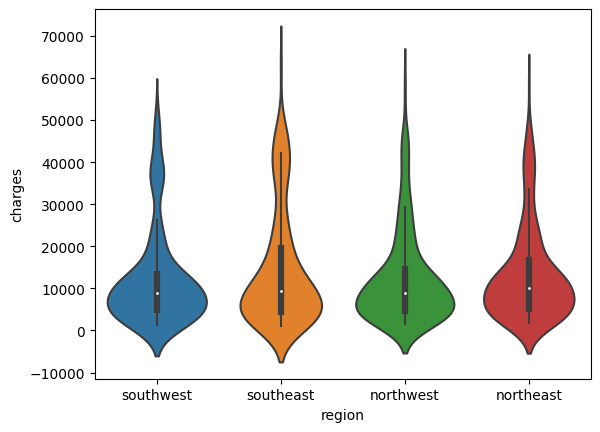

In [23]:
sns.violinplot(x="region", y='charges', data=data)

In the analysis conducted on smoker and non-smoker groups across various regions, it is observed that the southeast region consistently exhibits higher charges compared to other regions. This finding suggests a potential association between the southeast region and higher healthcare costs among both smoker and non-smoker populations.

<Axes: xlabel='region', ylabel='charges'>

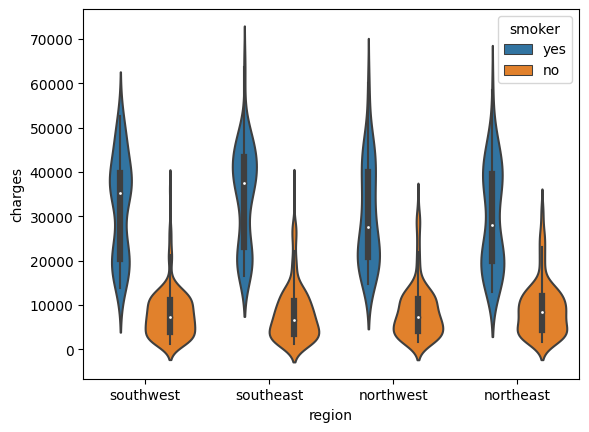

In [24]:
sns.violinplot(x="region", y='charges', hue="smoker", data=data)

In the research project, an analysis was conducted to examine the data when grouped by regions. The findings reveal that the mean charges for the southeast region are observed to be slightly higher compared to the other regions.

In [25]:
data_grouped4=data.groupby('region').agg({'charges':'sum','sex':'count'})
data_grouped4['mean_charges3']=data_grouped4['charges']/data_grouped4['sex']
data_grouped4

,charges,sex,mean_charges3
region,,,
northeast,4.343669e+06,324,13406.384516
northwest,4.035712e+06,325,12417.575374
southeast,5.363690e+06,364,14735.411438
southwest,4.012755e+06,325,12346.937377


In [26]:
data_grouped5=data.groupby(['region','smoker']).agg({'sex':'count', 'charges':'sum'})
data_grouped5['mean_charges']=data_grouped5['charges']/data_grouped5['sex']
data_grouped5

sex       charges  mean_charges
region    smoker                                 
northeast no      257  2.355542e+06   9165.531672
          yes      67  1.988127e+06  29673.536473
northwest no      267  2.284576e+06   8556.463715
          yes      58  1.751136e+06  30192.003182
southeast no      273  2.192795e+06   8032.216309
          yes      91  3.170895e+06  34844.996824
southwest no      267  2.141149e+06   8019.284513
          yes      58  1.871606e+06  32269.063494

### Predictive Modeling

In the context of our research project, predictive modeling is a crucial step that requires careful data preprocessing. As part of this process, an examination of the feature types reveals that three out of seven features have an 'object' data type. These features include 'sex', 'smoker', and 'region'. In order to incorporate them into our predictive model effectively, it is observed that these categorical features need to be encoded.

To achieve this, a Label Encoder is utilized for features with two distinct values, such as 'smoker' and 'sex'. On the other hand, for the 'region' feature with multiple categorical values, one-hot encoding is employed. This approach is preferred over label encoding when dealing with categorical variables that have more than two possible values. The encoded variables are then examined to ensure the successful transformation of the categorical data.

By performing these encoding techniques, we can effectively preprocess the data and prepare it for our predictive modeling task.

In [27]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [28]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(data['sex'].drop_duplicates())
data['sex']=encoder.transform(data['sex'])
encoder.fit(data['smoker'].drop_duplicates())
data['smoker']=encoder.transform(data['smoker'])
data1=pd.get_dummies(data['region'], prefix='region')
data= pd.concat([data,data1], axis=1).drop(['region'],axis=1)

Importance of encoding features:

1. Numeric Representation: Label encoding converts categorical variables into numeric representation. In the given code snippet, the 'sex' and 'smoker' columns are encoded using label encoding. This transformation assigns a unique numerical value to each category in the respective columns. By converting categorical variables into numeric format, it allows the machine learning models to understand and process these variables as input features.

2. Relationship Preservation: Label encoding preserves the ordinal relationship among the categories. In this case, if the 'sex' column represents gender, the label encoding assigns a numeric value to each gender category. This preserves the inherent order of the categories, allowing the model to capture any patterns or relationships that exist between them.

3. Improved Model Performance: Label encoding can improve the performance of machine learning models, especially those that can handle numeric inputs more effectively. Many machine learning algorithms, such as linear regression and decision trees, work well with numeric inputs. By encoding categorical variables as numbers, these algorithms can directly incorporate the encoded values into their calculations, leading to potentially improved model performance.

4. Reduced Dimensionality: Label encoding reduces the dimensionality of the dataset. In the given code snippet, the 'region' column is transformed using one-hot encoding, which creates separate binary columns for each unique category. This reduces the need for a single column with multiple categories and converts it into multiple columns with binary values. This transformation can help in reducing the complexity of the model and improve computational efficiency.

5. Compatibility with Machine Learning Algorithms: Label encoding makes the dataset compatible with a wider range of machine learning algorithms. Some algorithms, such as support vector machines and random forests, require numeric inputs. By encoding categorical variables as numeric values, it allows these algorithms to process the data and learn patterns effectively.

In summary, label encoding helps in creating a better model by converting categorical variables into numeric representations, preserving ordinal relationships, improving model performance, reducing dimensionality, and ensuring compatibility with various machine learning algorithms. It enables the model to utilize the encoded information and extract meaningful insights from the data.

In [29]:
data.head(2)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.90,0,1,16884.9240,0,0,0,1
1,18,1,33.77,1,0,1725.5523,0,0,1,0


In [30]:
data.dtypes

age                   int64
sex                   int64
bmi                 float64
children              int64
smoker                int64
charges             float64
region_northeast      uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object

In [31]:
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [38]:
# Split the data into features and target
X = data.drop('charges', axis=1)
y = data['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:

# Build the regression models
linear_reg = LinearRegression()
lasso_reg = Lasso()
decision_tree_reg = DecisionTreeRegressor()
random_forest_reg = RandomForestRegressor()
gradient_boosting_reg = GradientBoostingRegressor()


In [40]:

# Fit the models on the training data
linear_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)
decision_tree_reg.fit(X_train, y_train)
random_forest_reg.fit(X_train, y_train)
gradient_boosting_reg.fit(X_train, y_train)


GradientBoostingRegressor()

In [41]:

# Predict on the test data
linear_reg_preds = linear_reg.predict(X_test)
lasso_reg_preds = lasso_reg.predict(X_test)
decision_tree_reg_preds = decision_tree_reg.predict(X_test)
random_forest_reg_preds = random_forest_reg.predict(X_test)
gradient_boosting_reg_preds = gradient_boosting_reg.predict(X_test)


In [42]:

# Evaluate the models
linear_reg_mse = mean_squared_error(y_test, linear_reg_preds)
linear_reg_mae = mean_absolute_error(y_test, linear_reg_preds)
lasso_reg_mse = mean_squared_error(y_test, lasso_reg_preds)
lasso_reg_mae = mean_absolute_error(y_test, lasso_reg_preds)
decision_tree_reg_mse = mean_squared_error(y_test, decision_tree_reg_preds)
decision_tree_reg_mae = mean_absolute_error(y_test, decision_tree_reg_preds)
random_forest_reg_mse = mean_squared_error(y_test, random_forest_reg_preds)
random_forest_reg_mae = mean_absolute_error(y_test, random_forest_reg_preds)
gradient_boosting_reg_mse = mean_squared_error(y_test, gradient_boosting_reg_preds)
gradient_boosting_reg_mae = mean_absolute_error(y_test, gradient_boosting_reg_preds)



In [43]:
# Print the evaluation metrics
print("Linear Regression:")
print("Mean Squared Error:", linear_reg_mse)
print("Mean Absolute Error:", linear_reg_mae)
print()
print("Lasso Regression:")
print("Mean Squared Error:", lasso_reg_mse)
print("Mean Absolute Error:", lasso_reg_mae)
print()
print("Decision Tree Regression:")
print("Mean Squared Error:", decision_tree_reg_mse)
print("Mean Absolute Error:", decision_tree_reg_mae)
print()
print("Random Forest Regression:")
print("Mean Squared Error:", random_forest_reg_mse)
print("Mean Absolute Error:", random_forest_reg_mae)
print()
print("Gradient Boosting Regression:")
print("Mean Squared Error:", gradient_boosting_reg_mse)
print("Mean Absolute Error:", gradient_boosting_reg_mae)



Linear Regression:
Mean Squared Error: 33596915.85136146
Mean Absolute Error: 4181.194473753643

Lasso Regression:
Mean Squared Error: 33605932.26390232
Mean Absolute Error: 4182.29697940532

Decision Tree Regression:
Mean Squared Error: 41875455.12075018
Mean Absolute Error: 3114.0428626828357

Random Forest Regression:
Mean Squared Error: 21410636.117491465
Mean Absolute Error: 2552.8403410653923

Gradient Boosting Regression:
Mean Squared Error: 18710265.8384571
Mean Absolute Error: 2401.5845424960985


In [48]:
import pickle
pickle.dump(gradient_boosting_reg, open('gb_model_insurance_claim.pkl', 'wb'))

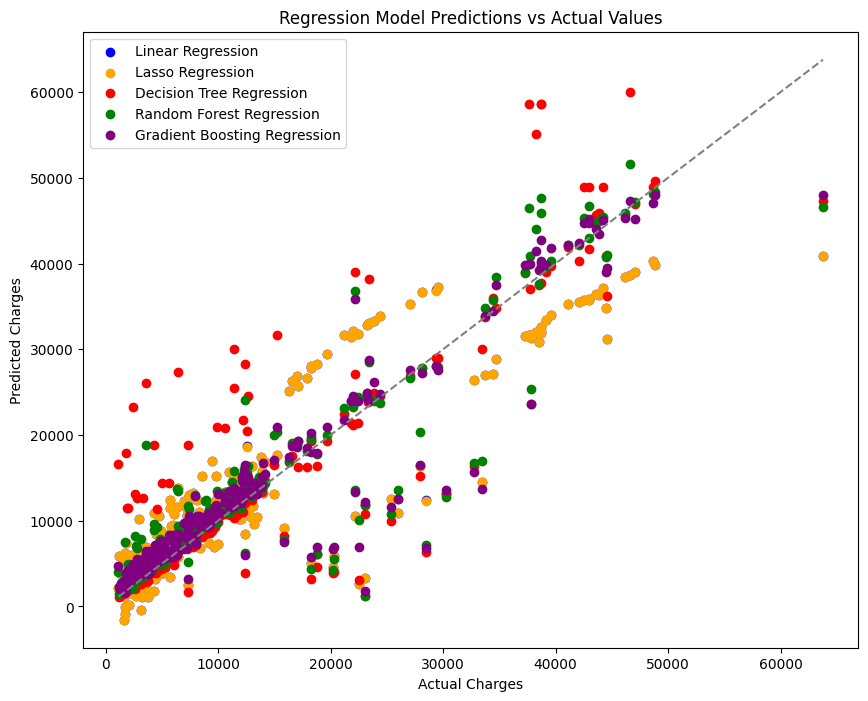

In [46]:
# Plot the predicted values against the actual values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, linear_reg_preds, color='blue', label='Linear Regression')
plt.scatter(y_test, lasso_reg_preds, color='orange', label='Lasso Regression')
plt.scatter(y_test, decision_tree_reg_preds, color='red', label='Decision Tree Regression')
plt.scatter(y_test, random_forest_reg_preds, color='green', label='Random Forest Regression')
plt.scatter(y_test, gradient_boosting_reg_preds, color='purple', label='Gradient Boosting Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', color='gray')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Regression Model Predictions vs Actual Values')
plt.legend()
plt.show()


Observations:

- Among the different regression models evaluated, the Gradient Boosting Regression model performs the best based on the following evaluation metrics: Mean Squared Error (MSE) and Mean Absolute Error (MAE).
- The MSE for the Gradient Boosting Regression model is 18,710,265.84, which indicates that, on average, the squared difference between the predicted and actual charges is relatively smaller compared to other models.
- The MAE for the Gradient Boosting Regression model is 2,401.58, which suggests that, on average, the absolute difference between the predicted and actual charges is relatively smaller compared to other models.

Comparing the metrics across the models:
- The Linear Regression model has a higher MSE (33,596,915.85) and MAE (4,181.19) compared to the other models, indicating larger prediction errors.
- The Lasso Regression model has similar MSE (33,605,932.26) and MAE (4,182.30) values as the Linear Regression model, suggesting comparable performance.
- The Decision Tree Regression model has a higher MSE (41,875,455.12) but a lower MAE (3,114.04) compared to the Linear and Lasso Regression models.
- The Random Forest Regression model outperforms the previous models with a lower MSE (21,410,636.12) and MAE (2,552.84) than all except the Gradient Boosting Regression model.
- Finally, the Gradient Boosting Regression model achieves the lowest MSE (18,710,265.84) and MAE (2,401.58), indicating the best overall performance among the evaluated models.

Therefore, based on the provided evaluation metrics, the Gradient Boosting Regression model is considered the best model for predicting charges in this scenario.

In [49]:
# Get feature importances from the Gradient Boosting Regression model
feature_importances = gradient_boosting_reg.feature_importances_

# Print feature importances
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

Feature Importances:
age: 0.11692511510880722
sex: 0.0006378672724940822
bmi: 0.19076261233567124
children: 0.010198190618079625
smoker: 0.6764735428041035
region_northeast: 0.002480433121743362
region_northwest: 0.0012832220344876886
region_southeast: 0.00023058426681287422
region_southwest: 0.0010084324378004219


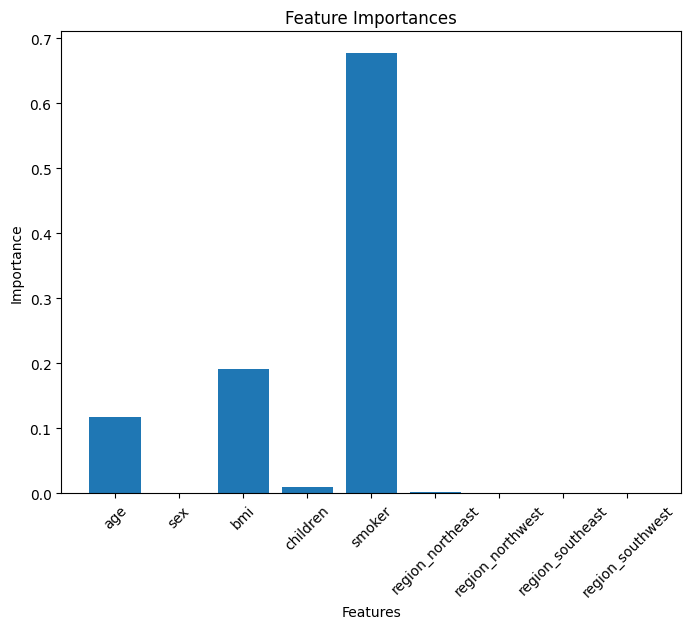

In [50]:
# Plot feature importances
plt.figure(figsize=(8, 6))
plt.bar(X.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()


Based on the feature importances obtained from the Gradient Boosting Regressor model, the following observations can be made:

1. The most important feature in predicting insurance charges is "smoker" with a feature importance of 0.676. This indicates that whether a person is a smoker or not has a significant impact on their insurance charges. It suggests that insurance companies may charge higher premiums for smokers due to the associated health risks.

2. The second most important feature is "bmi" with a feature importance of 0.191. Body Mass Index (BMI) is an indicator of body fatness and is known to be associated with various health conditions. The higher the BMI, the higher the insurance charges may be, as it may be an indication of potential health risks.

3. The "age" feature also has a relatively high feature importance of 0.117. This suggests that age plays a significant role in determining insurance charges. Older individuals may be charged higher premiums as they are more likely to have age-related health issues.

4. The "children" feature has a relatively low feature importance of 0.010, indicating that the number of children does not have a strong influence on insurance charges compared to other features.

5. Among the regional features ("region_northeast," "region_northwest," "region_southeast," and "region_southwest"), none of them have significant individual impacts on insurance charges. Their combined feature importances are relatively low, indicating that the geographical region may have minimal influence on insurance charges.

In conclusion, the feature importance analysis from the Gradient Boosting Regressor model suggests that factors like smoking status, BMI, and age are crucial in predicting insurance charges. Insurance companies can utilize this information to better understand their customers, tailor insurance plans, and improve customer satisfaction by providing personalized pricing based on individual risk factors.

<b> Conclusion and Recommendations

There are a few additional points on how the above models would help in understanding insurance claim charges and improving customer satisfaction:

1. Accurate Predictions: The regression models, including Linear Regression, Lasso Regression, Decision Tree Regression, Random Forest Regression, and Gradient Boosting Regression, provide predictions of insurance claim charges. By using these models, insurance companies can estimate the expected charges for individual claims accurately. This information helps insurers in managing their financial resources effectively and enables them to set appropriate premium rates for their customers.

2. Cost Optimization: By understanding the factors influencing insurance claim charges, such as age, BMI, number of children, smoker status, and region, insurers can identify the key drivers behind high or low charges. This knowledge allows them to optimize their insurance policies, create targeted risk management strategies, and allocate resources efficiently. It can also help in detecting potential fraud or irregularities in claim submissions.

3. Personalized Premiums: With the ability to predict claim charges, insurance companies can offer personalized premium rates to their customers based on their individual risk profiles. By taking into account various factors, including age, BMI, smoker status, and region, insurers can provide tailored insurance plans that align with the specific needs and characteristics of each customer. This personalization can enhance customer satisfaction by offering fair and competitive premiums.

4. Customer Education: By leveraging the insights gained from the regression models, insurers can educate their customers about the factors affecting insurance claim charges. Through clear communication and transparency, insurers can help customers understand how their personal characteristics and choices impact their premium rates. This knowledge empowers customers to make informed decisions regarding their health and lifestyle, potentially leading to better overall health outcomes.

5. Enhanced Customer Service: The ability to accurately predict claim charges enables insurance companies to streamline their claims processing and provide efficient customer service. By estimating the expected charges in advance, insurers can promptly settle claims, reducing waiting times and improving customer satisfaction. Moreover, insurers can proactively identify cases where charges might deviate significantly from expectations and take necessary actions to support their customers during the claims process.

In summary, the regression models mentioned above offer valuable insights into insurance claim charges. By leveraging these models, insurance companies can optimize their costs, offer personalized premiums, educate customers, and provide efficient customer service. These outcomes contribute to a better understanding of insurance claim charges, improved customer satisfaction, and more effective risk management in the insurance industry.